In [35]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import numpy as np

load the dataset

In [36]:
# Read CSV
df = pd.read_csv("Nepali_Treking.csv")
df.head()

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
0,0,Everest Base Camp Trek,"\r\n$1,420 USD",16 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,9/13/2022,Non-Binary,...,Yes,400000,6,1,No,No,0,2017,0,total
1,1,Everest Base Camp Short Trek,"\r\n$1,295 USD",14 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,9/4/2021,Female,...,Yes,1250000,7,0,No,No,0,2017,40,Afghanistan
2,2,Everest Base Camp Heli Shuttle Trek,\r\n$2000 USD,12 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/25/2021,Female,...,Yes,500000,4,1,No,No,1,2017,80,Albania
3,3,Everest Base Camp Heli Trek,"\r\n$3,300 USD",11 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/28/2022,Non-Binary,...,Yes,700000,3,1,No,No,0,2017,120,Algeria
4,4,Everest Base Camp Trek for Seniors,"\r\n$1,800 USD",20 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,10/21/2021,Non-Binary,...,Yes,700000,8,1,Yes,No,0,2017,200,Andra


In [37]:
# Alphabetical Order
df = df.sort_values("Trek")
df

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
90,90,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,8/7/2023,Transgender,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
164,164,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
238,238,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/7/2022,Non-Binary,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
16,16,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/7/2022,Male,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
312,312,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
340,340,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
44,44,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
192,192,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/12/2023,Non-Binary,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


In [38]:
print("Top 5 popular treks:")
df['Trek'].value_counts().head(5)

Top 5 popular treks:


Trek
Annapurna Base Camp Trek    10
Annapurna Circuit Trek      10
Mardi Himal Trek            10
Upper Mustang Trek          10
Manaslu Circuit Trek        10
Name: count, dtype: int64

In [39]:
# Dropping Unnecessary Columns
df = df.drop("Unnamed: 0", axis=1)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
90,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,8/7/2023,Transgender,27,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
164,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
238,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/7/2022,Non-Binary,29,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
16,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/7/2022,Male,28,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
312,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
340,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
44,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
192,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/12/2023,Non-Binary,28,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


In [40]:
# Index Reset
df= df.reset_index(drop=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
0,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,8/7/2023,Transgender,27,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
1,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
2,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/7/2022,Non-Binary,29,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
3,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/7/2022,Male,28,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
4,Annapurna Base Camp Heli Trek,"\r\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
379,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
380,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
381,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/12/2023,Non-Binary,28,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


# Data Cleaning

In [41]:
# Cleaning Treak Column
df['Trek'] = df['Trek'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
df['Trek'].head(5)

0    Annapurna Base Camp Heli Trek
1    Annapurna Base Camp Heli Trek
2    Annapurna Base Camp Heli Trek
3    Annapurna Base Camp Heli Trek
4    Annapurna Base Camp Heli Trek
Name: Trek, dtype: object

In [42]:
# Cleaning Cost, Time, Altitude
df['Cost'] = df['Cost'].str.replace(r'[^\d]', '', regex=True)
df['Time'] = df['Time'].str.replace(r'[^\d]', '', regex=True)

df["Max Altitude"] = (
    df["Max Altitude"]
    .str.replace("m", "")
    .str.replace(",", "")
    .str.strip()
    .astype(float)
)

# df['Max Altitude'] = df['Max Altitude'].str.replace(r'[^\d]', '', regex=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
0,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,8/7/2023,Transgender,27,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
1,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
2,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/7/2022,Non-Binary,29,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
3,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,10/7/2022,Male,28,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
4,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
379,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
380,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
381,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/12/2023,Non-Binary,28,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


In [43]:
# Trek Grade Mapping
grade_mapping = {
    'Easy': 1,
    'Easy To Moderate': 1,
    'Easy-Moderate': 1,
    'Light': 2,
    'Light+Moderate': 2,
    'Moderate': 2,
    'Moderate+Demanding': 3,
    'Moderate-Hard': 3,
    'Demanding': 4,
    'Demanding+Challenging': 4,
    'Strenuous': 5
}

df["Trip Grade"] = df['Trip Grade'].map(grade_mapping)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
0,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,8/7/2023,Transgender,27,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
1,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
2,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/7/2022,Non-Binary,29,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
3,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,10/7/2022,Male,28,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
4,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
379,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
380,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
381,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/12/2023,Non-Binary,28,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


In [44]:
# Cleaning Best Travel Time Column
df["Best Travel Time"] = (
    df["Best Travel Time"].str.replace(".", "", regex=False)
    .str.replace("Setpt", "Sept", regex=False)
    .str.title()
)

# Further clean to standardize "Month - Month & Month - Month" format
def clean_travel_time(row):
    pattern = r'([A-Za-z]{3,4})\s*-\s*([A-Za-z]{3,4})\s*&\s*([A-Za-z]{3,4})\s*-\s*([A-Za-z]{3,4})'
    match = re.match(pattern, row)

    if match:
        return f"{match.group(1)} - {match.group(2)} & {match.group(3)} - {match.group(4)}"
    
    return row 

df["Best Travel Time"] = df["Best Travel Time"].apply(clean_travel_time)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
0,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,8/7/2023,Transgender,27,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
1,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
2,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/7/2022,Non-Binary,29,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
3,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,10/7/2022,Male,28,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
4,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
379,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
380,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
381,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/12/2023,Non-Binary,28,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


In [45]:
# Best travel time mapping 
seasons = {
    'Jan - May & Sept - Dec': 'Spring/Autumn/Winter',
    'March - May & Sept - Dec': 'Spring/Autumn',
    'March - May & Sept - Nov': 'Spring/Autumn',
    'March-May & Sept-Dec':'Spring/Autumn'
}

df["Best Travel Time"] = df["Best Travel Time"].map(seasons)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country
0,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,Spring/Autumn,8/7/2023,Transgender,27,...,Yes,1050000,3,0,No,No,0,2017,3980,Kazakhstan
1,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,Spring/Autumn,5/27/2023,Transgender,28,...,Yes,300000,6,0,No,No,0,2017,7050,Slovenia
2,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,Spring/Autumn,5/7/2022,Non-Binary,29,...,Yes,600000,3,1,No,No,0,2016,1520,Chile
3,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,Spring/Autumn,10/7/2022,Male,28,...,Yes,1150000,4,1,No,No,0,2017,560,Belgium
4,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Hotel/Teahouses,Spring/Autumn,6/24/2022,Non-Binary,32,...,Yes,850000,7,0,No,No,0,2016,4540,Malawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,5/22/2022,Non-Binary,31,...,Yes,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia
379,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,9/29/2021,Male,27,...,No,800000,7,1,No,No,0,2016,5860,Pakistan
380,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,3/23/2022,Female,25,...,Yes,1400000,7,0,No,Yes,1,2017,1910,Croatia
381,Upper Mustang Trek,1499,17,3,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,3/12/2023,Non-Binary,28,...,Yes,800000,4,1,No,Yes,0,2017,8400,united states of america


In [46]:
# Clean the 'Accomodation' column by removing 'Hotel/' substring
df['Accomodation'] = df['Accomodation'].replace('Hotel/', '', regex=True)

In [47]:
accommodation_replacements = {
    'Guest House': 'Guesthouse',
    'Guest Houses': 'Guesthouse',
    'Guesthouse': 'Guesthouse',
    'Guesthouses': 'Guesthouse',
    'Teahouse': 'Teahouse',
    'Teahouses': 'Teahouse',
    'Teahouses/Lodges': 'Teahouse',
    'Lodges': 'Lodge',
    'Luxury Lodges': 'Lodge'
}

# Apply the replacements to the 'Accomodation' column
df['Accomodation'] = df['Accomodation'].replace(accommodation_replacements)

In [48]:
# Clustering
df['Cluster'] = -1

df.loc[df['Trek'].str.contains('Annapurna', case=False), 'Cluster'] = 1
df.loc[df['Trek'].str.contains('Everest', case=False), 'Cluster'] = 2
df.loc[df['Trek'].str.contains('Poon Hill', case=False), 'Cluster'] = 3
df.loc[df['Trek'].str.contains('Gokyo', case=False), 'Cluster'] = 4
df.loc[df['Trek'].str.contains('Helambu', case=False), 'Cluster'] = 5
df.loc[df['Trek'].str.contains('Kanchenjunga', case=False), 'Cluster'] = 6
df.loc[df['Trek'].str.contains('Langtang', case=False), 'Cluster'] = 7
df.loc[df['Trek'].str.contains('Makalu', case=False), 'Cluster'] = 8
df.loc[df['Trek'].str.contains('Manaslu', case=False), 'Cluster'] = 9
df.loc[df['Trek'].str.contains('Mardi', case=False), 'Cluster'] = 10
df.loc[df['Trek'].str.contains('Narphu', case=False), 'Cluster'] = 11
df.loc[df['Trek'].str.contains('Rara', case=False), 'Cluster'] = 12
df.loc[df['Trek'].str.contains('Mustang', case=False), 'Cluster'] = 13

df = df[df['Cluster'] != -1]

df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country,Cluster
0,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,8/7/2023,Transgender,27,...,1050000,3,0,No,No,0,2017,3980,Kazakhstan,1
1,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,5/27/2023,Transgender,28,...,300000,6,0,No,No,0,2017,7050,Slovenia,1
2,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,5/7/2022,Non-Binary,29,...,600000,3,1,No,No,0,2016,1520,Chile,1
3,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,10/7/2022,Male,28,...,1150000,4,1,No,No,0,2017,560,Belgium,1
4,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,6/24/2022,Non-Binary,32,...,850000,7,0,No,No,0,2016,4540,Malawi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,5/22/2022,Non-Binary,31,...,1500000,4,1,Yes,Yes,1,2017,4960,Mongolia,13
379,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,9/29/2021,Male,27,...,800000,7,1,No,No,0,2016,5860,Pakistan,13
380,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,3/23/2022,Female,25,...,1400000,7,0,No,Yes,1,2017,1910,Croatia,13
381,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,3/12/2023,Non-Binary,28,...,800000,4,1,No,Yes,0,2017,8400,united states of america,13


In [49]:
# #date of travel column
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')

In [50]:
df[df['Year']==5460]

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Year,Regional code,Country,Cluster
244,Manaslu Circuit Trek,1190,17,3,5220.0,Guesthouse,Spring/Autumn/Winter,2025-05-13,Female,31,...,1400000,3,1,Yes,No,1,5460,4560,Nepal,9


In [51]:
#year value 5460  change with the mode value
mode_year = df['Year'].mode()[0]
df['Year'] = df['Year'].replace(5460, mode_year)

In [52]:
# Map 'GraduateOrNot' column to 0 and 1
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})

In [53]:
df['GraduateOrNot'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: GraduateOrNot, dtype: int64

In [54]:
#frequentflyer column mapping as 0 and 1
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})

In [55]:
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [56]:
#employment  Type column 
df['Employment Type'] = df['Employment Type'].str.strip().str.lower() 

#mapping
employment_mapping = {
    'government sector': 0,
    'private sector/self employed': 1
}

df['Employment Type'] = df['Employment Type'].map(employment_mapping)

Trekkers segmentation Analysis

In [57]:
# Trekkers demographics based on statistics
# based on age
age_dist = df['Age'].describe()
print("Trekkers age distribution:")
print(age_dist)

#based on sex in percentage
sex_dist = df['Sex'].value_counts(normalize=True) * 100
print("Trekkers sex distribution (%):")
print(sex_dist)

Trekkers age distribution:
count    338.000000
mean      29.677515
std        2.874140
min       25.000000
25%       28.000000
50%       29.000000
75%       32.000000
max       35.000000
Name: Age, dtype: float64
Trekkers sex distribution (%):
Sex
Male           26.923077
Female         26.627219
Non-Binary     23.372781
Transgender    23.076923
Name: proportion, dtype: float64


In [58]:
#sex column visualization using plotly with a pie
# Create the pie chart
fig = px.pie(df, names='Sex', title='Sex distribution of trekkers', hole=0.3)
fig.update_traces(textinfo='percent+label', pull=[0.02, 0.03], marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(
    showlegend=True,
    margin=dict(t=0, b=0, l=0, r=0),
    annotations=[dict(text='Sex', x=0.5, y=0.5, font_size=20, showarrow=False)],
    paper_bgcolor="white"
)

# Show the plot
fig.show()

Based on travel patterns of the trekkers

In [59]:
#used travelinsurance, frequent flyer and ever travelled abroad
#distribution in percentage
travel_insurance_dist = df['TravelInsurance'].value_counts(normalize=True) * 100
print("Trekkers used travel insurance distribution (%):")
print(travel_insurance_dist)

frequent_flyer_dist = df['FrequentFlyer'].value_counts(normalize=True) * 100
print("Trekkers frequent flyer distribution (%):")
print(frequent_flyer_dist)

ever_travelled_abroad_dist = df['EverTravelledAbroad'].value_counts(normalize=True) * 100
print("Trekkers ever travelled abroad distribution (%):")
print(ever_travelled_abroad_dist)

Trekkers used travel insurance distribution (%):
TravelInsurance
0    65.680473
1    34.319527
Name: proportion, dtype: float64
Trekkers frequent flyer distribution (%):
FrequentFlyer
0    77.810651
1    22.189349
Name: proportion, dtype: float64
Trekkers ever travelled abroad distribution (%):
EverTravelledAbroad
0    81.065089
1    18.934911
Name: proportion, dtype: float64


Trekkers employment analysis

In [60]:
#based on employment graduateor not and annual income
employment_dist = df['Employment Type'].value_counts(normalize=True) * 100
print("Trekkers employment distribution (%):")
print(employment_dist)

graduate_dist = df['GraduateOrNot'].value_counts(normalize=True) * 100
print("Trekkers graduate distribution (%):")
print(graduate_dist)

annual_income_dist = df['AnnualIncome'].value_counts(normalize=True) * 100
print("Trekkers annual income distribution (%):")
print(annual_income_dist)

Trekkers employment distribution (%):
Employment Type
1    71.301775
0    28.698225
Name: proportion, dtype: float64
Trekkers graduate distribution (%):
GraduateOrNot
1    84.023669
0    15.976331
Name: proportion, dtype: float64
Trekkers annual income distribution (%):
AnnualIncome
800000     9.467456
1400000    7.396450
1300000    7.100592
1200000    5.029586
500000     4.733728
1150000    4.733728
1250000    4.733728
300000     4.437870
600000     4.437870
1100000    4.437870
900000     4.142012
700000     3.846154
350000     3.846154
1500000    3.550296
400000     3.550296
750000     3.550296
1050000    3.254438
850000     3.254438
1000000    2.958580
550000     2.366864
1350000    2.366864
1700000    1.775148
650000     1.775148
950000     0.887574
1550000    0.591716
450000     0.591716
1450000    0.591716
1800000    0.295858
1650000    0.295858
Name: proportion, dtype: float64


In [61]:
#sex column mapping 
sex_mapping = {
    'Male': 0,
    'Female': 1,
    'Non-Binary': 2,
    'Transgender': 3
}

# Apply the mapping to the 'Sex' column
df['Sex'] = df['Sex'].map(sex_mapping)

In [62]:
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

Cost Distribution visualization

## Visualization

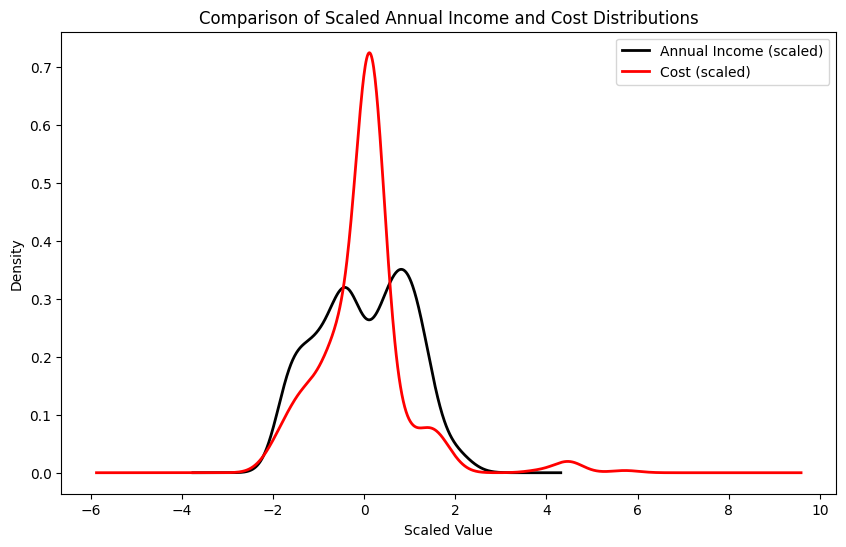

In [66]:
# Normalize the columns scale gareako xu hai aaile lai tara tala chai annualincome ko feature engineering gareako xa
df['AnnualIncome_scaled'] = (df['AnnualIncome'] - df['AnnualIncome'].mean()) / df['AnnualIncome'].std()
df['Cost_scaled'] = (df['Cost'] - df['Cost'].mean()) / df['Cost'].std()

# Plot KDE for both normalized 'AnnualIncome' and 'Cost' on the same figure
plt.figure(figsize=(10, 6))
df["AnnualIncome_scaled"].plot(kind="kde", label="Annual Income (scaled)", color="black", linewidth=2)
df["Cost_scaled"].plot(kind="kde", label="Cost (scaled)", color="r", linewidth=2)

plt.title("Comparison of Scaled Annual Income and Cost Distributions")
plt.xlabel("Scaled Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [67]:
# Create the scatter plot
fig = px.scatter(
    df,
    x='Cost',
    y='Max Altitude',
    color='Sex',
    size='AnnualIncome',
    size_max=10,
    symbol='Employment Type',
    title='Max Altitude vs Cost with Gender, Annual Income, and Employment Type',
    labels={'Cost': 'Cost', 'Max Altitude': 'Max Altitude'},
    template='plotly_white'
)
# Update layout for better visualization
fig.update_layout(
    legend=dict(
        title='Legend',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

# Show the plot
fig.show()

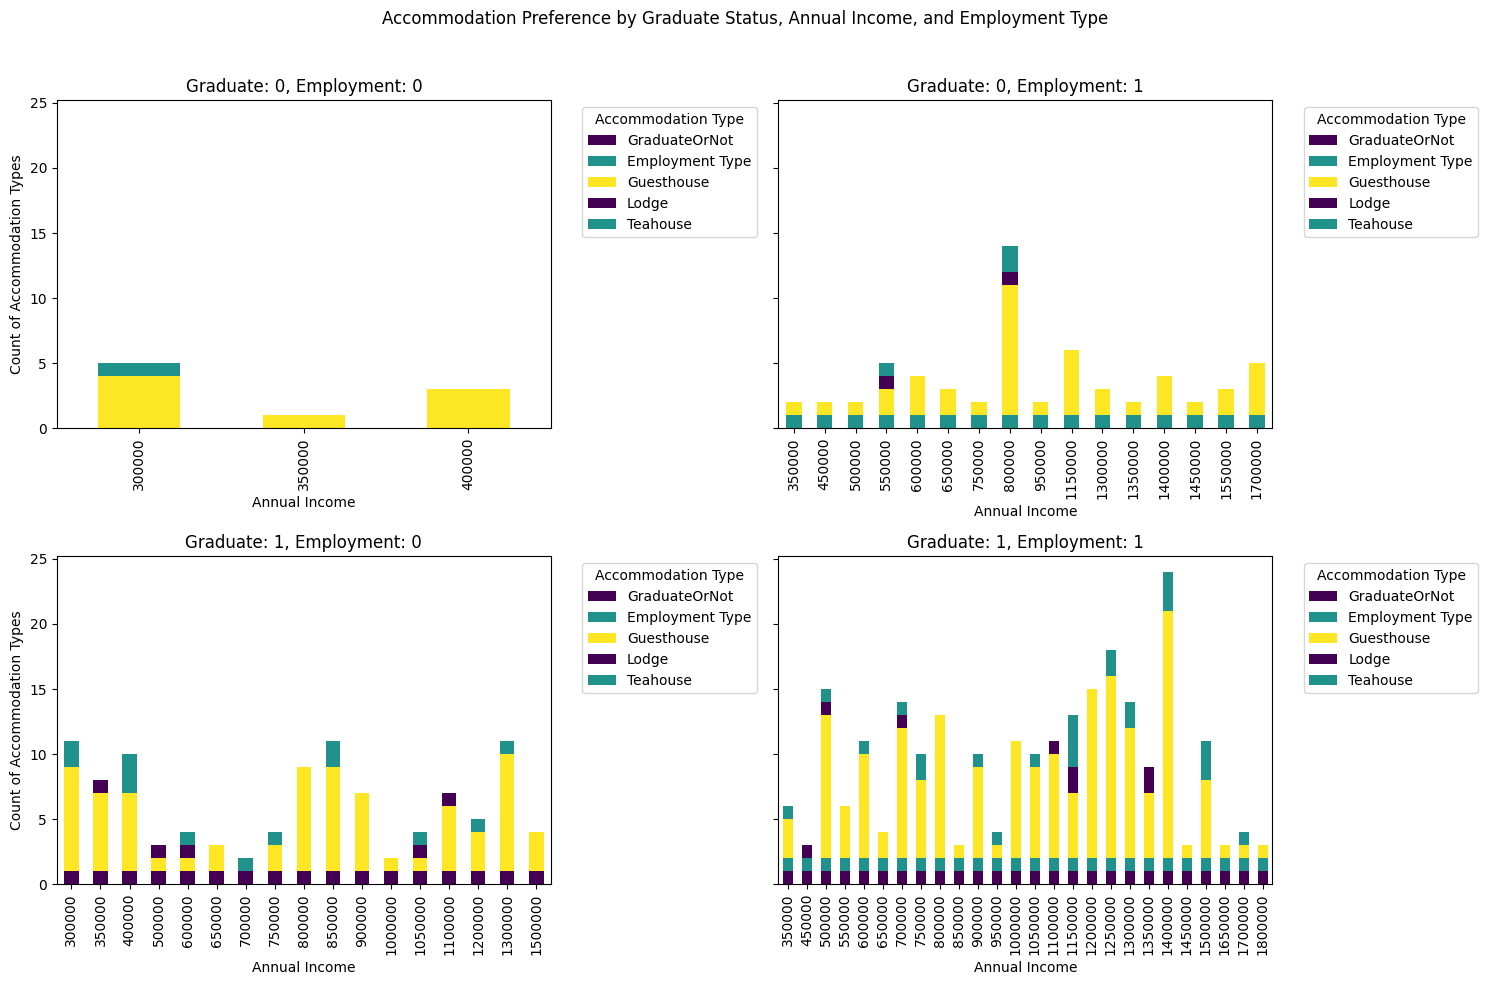

In [68]:
# Group by 'GraduateOrNot', 'AnnualIncome', and 'Employment Type', and count the occurrences of each accommodation type
accommodation_counts = df.groupby(['GraduateOrNot', 'AnnualIncome', 'Employment Type', 'Accomodation']).size().unstack(fill_value=0)

accommodation_counts = accommodation_counts.reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(accommodation_counts.columns[3:])))

# Plot each combination of GraduateOrNot and Employment Type
for (grad_status, emp_type), group_data in accommodation_counts.groupby(['GraduateOrNot', 'Employment Type']):
    ax = axes[grad_status, emp_type]
    group_data.plot(kind='bar', x='AnnualIncome', stacked=True, color=colors, ax=ax)
    ax.set_title(f'Graduate: {grad_status}, Employment: {emp_type}')
    ax.set_xlabel('Annual Income')
    ax.set_ylabel('Count of Accommodation Types')
    ax.legend(title='Accommodation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Accommodation Preference by Graduate Status, Annual Income, and Employment Type')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

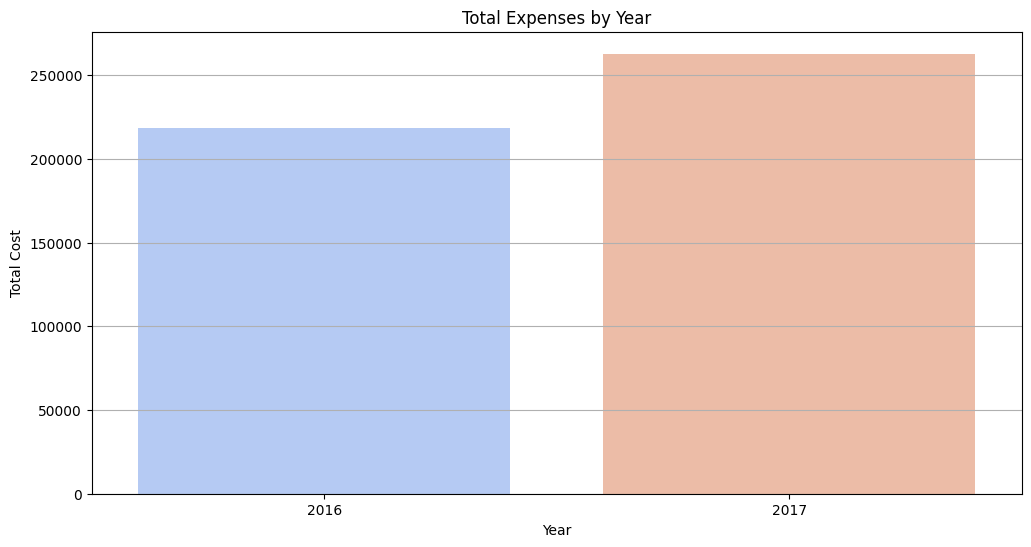

In [69]:
# Grouping by Year and summing the Cost
Expenses = df.groupby('Year')['Cost'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=Expenses, x='Year', y='Cost', palette='coolwarm')

# Customize the plot
plt.title('Total Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.xticks(rotation=0)
plt.grid(axis='y')  # Adding grid lines for better readability
plt.show()


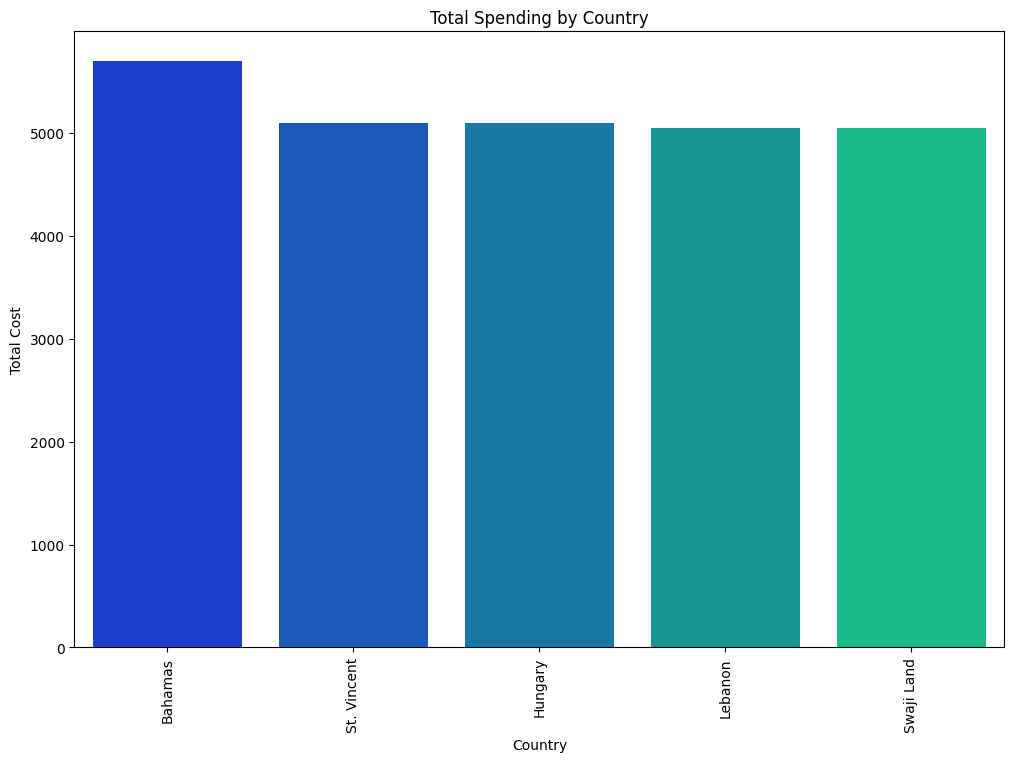

In [70]:
# Group by 'Country' and sum the 'Cost'
country_spending = df.groupby('Country')['Cost'].sum().reset_index()
# Sort the data by 'Cost' in descending order
country_spending = country_spending.sort_values(by='Cost', ascending=False).head(5)
# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Cost', data=country_spending, palette='winter')

# Customizing the plot
plt.title('Total Spending by Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [71]:
df.columns

Index(['Trek', 'Cost', 'Time', 'Trip Grade', 'Max Altitude', 'Accomodation',
       'Best Travel Time', 'Date of Travel', 'Sex', 'Age', 'Employment Type',
       'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance', 'Year',
       'Regional code', 'Country', 'Cluster', 'AnnualIncome_scaled',
       'Cost_scaled'],
      dtype='object')

In [83]:
df.describe()

,Cost,Time,Trip Grade,Max Altitude,Date of Travel,Sex,Age,Employment Type,GraduateOrNot,AnnualIncome,...,EverTravelledAbroad,TravelInsurance,Year,Regional code,Cluster,AnnualIncome_scaled,Cost_scaled,Time_MaxAltitude,Log_AnnualIncome,Log_MaxAltitude
count,338.000000,338.000000,338.000000,338.000000,338,338.000000,338.000000,338.000000,338.000000,3.380000e+02,...,338.000000,338.000000,338.00000,338.000000,338.000000,3.380000e+02,3.380000e+02,338.000000,338.000000,338.000000
mean,1424.556213,14.786982,2.653846,4755.961538,2021-11-15 16:36:55.384615424,1.426036,29.677515,0.713018,0.840237,9.468935e+05,...,0.189349,0.343195,2016.54142,4100.316568,4.683432,-4.204395e-17,-1.997088e-16,72160.724852,13.666616,8.446369
min,450.000000,5.000000,1.000000,1990.000000,2020-01-03 00:00:00,0.000000,25.000000,0.000000,0.000000,3.000000e+05,...,0.000000,0.000000,2016.00000,0.000000,1.000000,-1.740850e+00,-2.009313e+00,9950.000000,12.611541,7.596392
25%,1190.000000,11.000000,2.000000,4200.000000,2020-12-04 00:00:00,0.000000,28.000000,0.000000,1.000000,6.500000e+05,...,0.000000,0.000000,2016.00000,1960.000000,1.000000,-7.989679e-01,-4.836014e-01,46440.000000,13.384729,8.343078
50%,1499.000000,15.000000,3.000000,5122.000000,2022-01-09 00:00:00,1.000000,29.000000,1.000000,1.000000,9.250000e+05,...,0.000000,0.000000,2017.00000,4170.000000,2.000000,-5.891741e-02,1.534861e-01,73600.000000,13.737185,8.541495
75%,1499.000000,18.000000,4.000000,5416.000000,2022-09-12 18:00:00,2.000000,32.000000,1.000000,1.000000,1.250000e+06,...,0.000000,1.000000,2017.00000,6140.000000,8.750000,8.156877e-01,1.534861e-01,92072.000000,14.038655,8.597297
max,4200.000000,27.000000,5.000000,6340.000000,2025-05-13 00:00:00,3.000000,35.000000,1.000000,1.000000,1.800000e+06,...,1.000000,1.000000,2017.00000,9990.000000,13.000000,2.295789e+00,5.722332e+00,135400.000000,14.403298,8.754792
std,485.019665,4.568848,1.278097,874.491955,NaN,1.117239,2.874140,0.453024,0.366930,3.715963e+05,...,0.392367,0.475480,0.49902,2447.090136,3.975118,1.000000e+00,1.000000e+00,28482.095972,0.462717,0.218679


Model Training

In [72]:
#correlation of [['Time', 'Trip Grade', 'Max Altitude', 'Age', 'Annual Income', 'Family Members']]
corr = df[['Time', 'Trip Grade', 'Max Altitude', 'Age', 'AnnualIncome', 'FamilyMembers','Cost','Sex','Age','FrequentFlyer', 'EverTravelledAbroad', 'AnnualIncome','ChronicDiseases']].corr()
corr

,Time,Trip Grade,Max Altitude,Age,AnnualIncome,FamilyMembers,Cost,Sex,Age,FrequentFlyer,EverTravelledAbroad,AnnualIncome,ChronicDiseases
Time,1.000000,0.608306,0.460490,0.059155,-0.010616,-0.113429,0.280118,0.014925,0.059155,0.051467,0.025877,-0.010616,-0.042387
Trip Grade,0.608306,1.000000,0.611832,0.022028,-0.030074,-0.031310,0.229902,-0.035647,0.022028,0.010944,0.060082,-0.030074,-0.004193
Max Altitude,0.460490,0.611832,1.000000,0.048049,-0.000369,0.008919,0.298811,-0.027363,0.048049,-0.029315,0.015839,-0.000369,0.037271
Age,0.059155,0.022028,0.048049,1.000000,-0.076513,0.058535,-0.033999,-0.102170,1.000000,-0.046677,-0.053576,-0.076513,-0.018488
AnnualIncome,-0.010616,-0.030074,-0.000369,-0.076513,1.000000,-0.095532,-0.006153,0.004627,-0.076513,0.311503,0.448737,1.000000,0.026584
FamilyMembers,-0.113429,-0.031310,0.008919,0.058535,-0.095532,1.000000,-0.100425,-0.013402,0.058535,0.026366,-0.061129,-0.095532,0.062914
Cost,0.280118,0.229902,0.298811,-0.033999,-0.006153,-0.100425,1.000000,0.010420,-0.033999,-0.022740,0.083286,-0.006153,0.074500
Sex,0.014925,-0.035647,-0.027363,-0.102170,0.004627,-0.013402,0.010420,1.000000,-0.102170,0.032214,0.079427,0.004627,0.109141
Age,0.059155,0.022028,0.048049,1.000000,-0.076513,0.058535,-0.033999,-0.102170,1.000000,-0.046677,-0.053576,-0.076513,-0.018488
FrequentFlyer,0.051467,0.010944,-0.029315,-0.046677,0.311503,0.026366,-0.022740,0.032214,-0.046677,1.000000,0.196254,0.311503,-0.089859


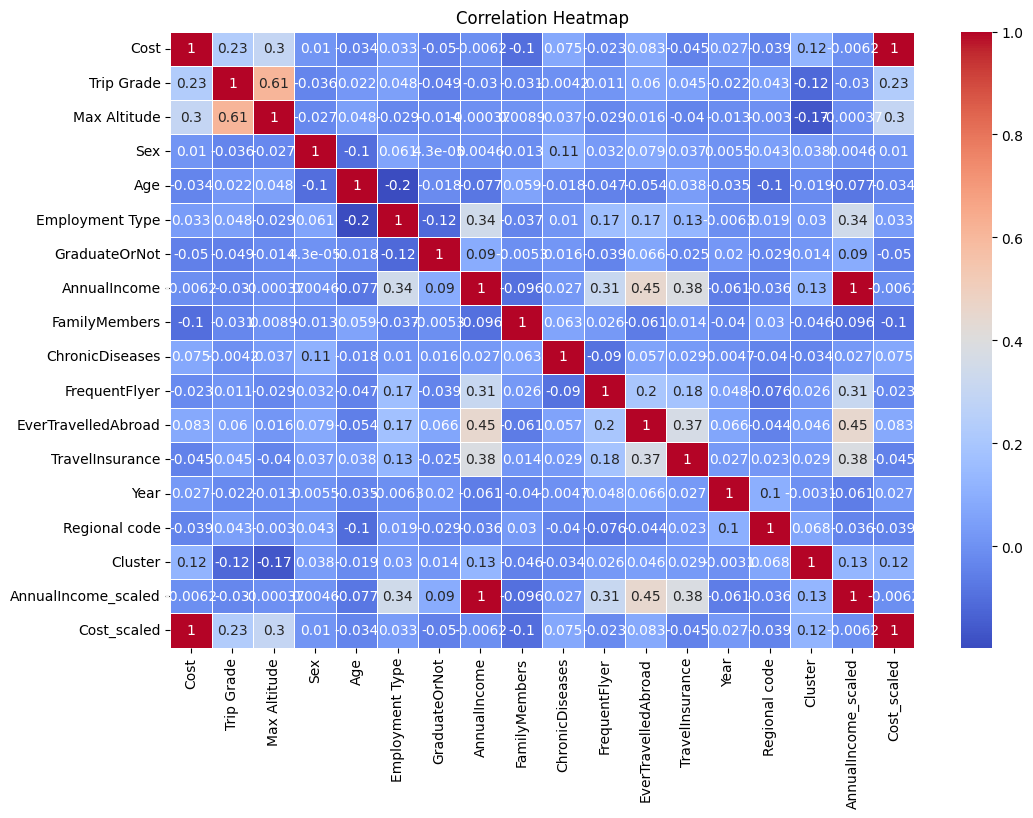

In [73]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=1), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Gradient Boosting Regressor

In [74]:
#features and targets based on Regression
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

#feature engineering
df['Time_MaxAltitude'] = df['Time'] * df['Max Altitude'] 
df['Log_AnnualIncome'] = np.log1p(df['AnnualIncome'])
df['Log_MaxAltitude'] = np.log1p(df['Max Altitude'])

features_reg = df[['Trip Grade', 'Age', 'FamilyMembers', 'Time_MaxAltitude', 'Log_AnnualIncome', 'Log_MaxAltitude']]
target_reg = df['Cost']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features_reg, target_reg, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_reg, y_train_reg)

y_pred_gbr = gbr.predict(X_test_reg)

In [75]:
mae = mean_absolute_error(y_test_reg, y_pred_gbr)
r2 = r2_score(y_test_reg, y_pred_gbr)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 65.35472581037936
R-squared (R²): 0.9574233991659512


RandomForestClassifier

In [76]:
#freture and target based on classification
features_clf = df[['Trip Grade', 'Employment Type', 'Sex', 'Age', 'FrequentFlyer', 'EverTravelledAbroad', 'Log_AnnualIncome', 'ChronicDiseases']]
target_clf = df['TravelInsurance']

#splitting
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(features_clf, target_clf, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(
    random_state=42, 
    n_estimators=300,         # Increase the number of trees
    max_depth=3,           
    min_samples_split=2,      # Use default, allowing more splits
    min_samples_leaf=2,       # Allow smaller leaf nodes
    max_features='sqrt'
)

rfc.fit(X_train_clf, y_train_clf)

y_pred_rfc = rfc.predict(X_test_clf)

In [77]:
# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred_rfc)
report = classification_report(y_test_clf, y_pred_rfc)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7647058823529411
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        44
           1       0.83      0.42      0.56        24

    accuracy                           0.76        68
   macro avg       0.79      0.69      0.70        68
weighted avg       0.78      0.76      0.74        68



In [78]:
# df.to_csv('cleaned_dataset.csv')
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,TravelInsurance,Year,Regional code,Country,Cluster,AnnualIncome_scaled,Cost_scaled,Time_MaxAltitude,Log_AnnualIncome,Log_MaxAltitude
0,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,2023-08-07,3,27,...,0,2017,3980,Kazakhstan,1,0.277469,0.670991,37890.0,13.864302,8.345455
1,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,2023-05-27,3,28,...,0,2017,7050,Slovenia,1,-1.740850,0.670991,37890.0,12.611541,8.345455
2,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,2022-05-07,2,29,...,0,2016,1520,Chile,1,-0.933523,0.670991,37890.0,13.304687,8.345455
3,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,2022-10-07,0,28,...,0,2017,560,Belgium,1,0.546578,0.670991,37890.0,13.955273,8.345455
4,Annapurna Base Camp Heli Trek,1750,9,1,4210.0,Teahouse,Spring/Autumn,2022-06-24,2,32,...,0,2016,4540,Malawi,1,-0.260749,0.670991,37890.0,13.652993,8.345455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,2022-05-22,2,31,...,1,2017,4960,Mongolia,13,1.488461,0.153486,65790.0,14.220976,8.261268
379,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,2021-09-29,0,27,...,0,2016,5860,Pakistan,13,-0.395304,0.153486,65790.0,13.592368,8.261268
380,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,2022-03-23,1,25,...,1,2017,1910,Croatia,13,1.219352,0.153486,65790.0,14.151984,8.261268
381,Upper Mustang Trek,1499,17,3,3870.0,Guesthouse,Spring/Autumn/Winter,2023-03-12,2,28,...,0,2017,8400,united states of america,13,-0.395304,0.153486,65790.0,13.592368,8.261268


model validation via cross validation and hyper parameter tuning

In [79]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV


param_grid_gbr = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#initializing the model and GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='r2', n_jobs=-1)

grid_search_gbr.fit(X_train_reg, y_train_reg)
#for bestfit
best_params_gbr = grid_search_gbr.best_params_
best_score_gbr = grid_search_gbr.best_score_

print("Best Parameters for Gradient Boosting Regressor:", best_params_gbr)
print("Best R² Score for Gradient Boosting Regressor:", best_score_gbr)

Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best R² Score for Gradient Boosting Regressor: 0.9479515527942421


In [80]:

# Visualization of predicted vs actual costs
fig_cost = px.scatter(x=y_test_reg, y=y_pred_gbr, labels={'x': 'Actual Cost', 'y': 'Predicted Cost'}, title='Actual vs Predicted Cost')
fig_cost.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y_test_reg.min(), y0=y_test_reg.min(),
    x1=y_test_reg.max(), y1=y_test_reg.max()
)
fig_cost.update_layout(paper_bgcolor="white")
fig_cost.show()

In [139]:

from sklearn.model_selection import cross_val_score
#Perform cross-validation
cv_scores_rfc = cross_val_score(rfc, features_clf, target_clf, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores for Random Forest Classifier:", cv_scores_rfc)
print("Mean accuracy score:", cv_scores_rfc.mean())

Cross-validation accuracy scores for Random Forest Classifier: [0.82352941 0.76470588 0.77941176 0.7761194  0.80597015]
Mean accuracy score: 0.7899473222124671


In [140]:
# Visualization of confusion matrix
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

cm = confusion_matrix(y_test_clf, y_pred_rfc)
fig_cm = ff.create_annotated_heatmap(z=cm, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'], colorscale='Viridis')
fig_cm.update_layout(title='Confusion Matrix', paper_bgcolor="white")
fig_cm.show()